Лабораторная работа №1

Работу выполнил Корешков Даниил

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [171]:
!pip install -q catboost

In [172]:
!pip install -q phik

Задание №1

In [173]:
df = pd.read_csv('Abit_2013-18.csv', encoding='windows-1251', delimiter=';')

emb = {-1 : 0, 3 : 0, 4 : 1, 5 : 0, 6 : 0, 7: 0, 1:1, 9: 1, 10:1}

df['Статус'] = df['Статус'].map(emb)

emb = {'муж' : 0, "жен" : 1}

df['Пол'] = df['Пол'].str.lower().map(emb)

df

,Код,Статус,Код_Группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Тип_УЗ,Уч_Заведение,...,Страна_Родители,Регион_Родители,Город_Родители,Число_Детей,Село,Иностранец,УслОбучения,КодФакультета,СреднийБаллЕГЭ,Приоритет
0,49276,1,16837.0,2013,0.0,ОО,Английский язык,23.02.1996,школа,"МБОУ ""СОШ №120""",...,Россия,Алтайский край,Барнаул,NaN,0.0,0.0,1,27,64.0,1.0
1,49246,0,11862.0,2013,0.0,ОО,Английский язык,13.11.1989,лицей,"КГБОУ НПО ""Профессиональный лицей №12""",...,Россия,Алтайский край,Барнаул,NaN,0.0,0.0,1,27,53.0,1.0
2,49658,1,16856.0,2013,0.0,ОО,Немецкий язык,03.10.1990,Училище,"КГОУ НПО ""Профессиональное училище №16""",...,Россия,Алтайский край,Барнаул,NaN,0.0,0.0,1,25,42.0,1.0
3,49793,0,11990.0,2013,0.0,СН,Английский язык,15.09.1983,техникум,"Барнаульский кооперативный техникум экономики,...",...,Россия,Алтайский край,Барнаул,NaN,0.0,0.0,3,25,54.0,1.0
4,50275,1,18167.0,2013,1.0,СН,Английский язык,16.03.1984,школа,"МБОУ ""Родинская СОШ №1""",...,Россия,Алтайский край,Кулунда с,1.0,1.0,0.0,3,40,41.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16819,86179,1,21238.0,2018,0.0,СН,Немецкий язык,26.06.2000,школа,МБОУ Кулундинская СОШ №3,...,Россия,Алтайский край,Кулунда с,NaN,1.0,0.0,3,41,48.0,3.0
16820,86179,1,21238.0,2018,0.0,СН,Немецкий язык,26.06.2000,школа,МБОУ Кулундинская СОШ №3,...,Россия,Алтайский край,Кулунда с,NaN,1.0,0.0,3,41,48.0,4.0
16821,86179,1,21238.0,2018,0.0,СН,Немецкий язык,26.06.2000,школа,МБОУ Кулундинская СОШ №3,...,Россия,Алтайский край,Кулунда с,NaN,1.0,0.0,3,41,48.0,5.0
16822,86189,1,21098.0,2018,1.0,ОО,Английский язык,24.10.1999,школа,КГУ СШ №10 ГУ Отдел образования г. Риддера,...,Казахстан,Восточно-Казахстанская область,г. Риддер,NaN,0.0,1.0,1,31,72.0,1.0


Задание №2

In [174]:
for col in df:
  print(col)
  print(df[col].unique())
  print('\n')


Код
[49276 49246 49658 ... 86179 86189 86190]


Статус
[1 0]


Код_Группы
[16837. 11862. 16856. ... 20304. 21378. 21239.]


Год_Поступления
[2013 2014 2015 2016 2017 2018]


Пол
[ 0.  1. nan]


Основания
['ОО' 'СН' 'ДН' 'БН' 'ЦН' 'ЛН']


Изучаемый_Язык
['Английский язык' 'Немецкий язык' 'Русский язык' nan 'Французский язык']


Дата_Рождения
['23.02.1996' '13.11.1989' '03.10.1990' ... '18.06.2001' '13.02.2001'
 '28.04.2001']


Тип_УЗ
['школа' 'лицей' 'Училище' 'техникум' 'колледж' 'университет' 'гимназия'
 'Школа' 'Техникум' 'академия' 'Колледж' nan 'Университет' 'Другое'
 'школа-гимназия' 'институт' 'НПО' 'Лицей' 'ПТУ' 'школа-интернат'
 'училище' 'Институт' 'другое' 'Гимназия' 'учреждение' 'школа-лицей'
 '2017' 'СОШ']


Уч_Заведение
['МБОУ "СОШ №120"' 'КГБОУ НПО "Профессиональный лицей №12"'
 'КГОУ НПО "Профессиональное училище №16"' ...
 'ФГАОУ ВО Белгородский государственный национальный исследовательский университет'
 'КГУ ОШ №116' 'МКОУ Жилинская СОШ им. В.С. Камышникова']


Где_На

Задание №3

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16824 entries, 0 to 16823
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Код                     16824 non-null  int64  
 1   Статус                  16824 non-null  int64  
 2   Код_Группы              16657 non-null  float64
 3   Год_Поступления         16824 non-null  int64  
 4   Пол                     16814 non-null  float64
 5   Основания               16824 non-null  object 
 6   Изучаемый_Язык          16663 non-null  object 
 7   Дата_Рождения           16811 non-null  object 
 8   Тип_УЗ                  16067 non-null  object 
 9   Уч_Заведение            16632 non-null  object 
 10  Где_Находится_УЗ        16152 non-null  object 
 11  Год_Окончания_УЗ        16599 non-null  float64
 12  Отличник_УЗ             2628 non-null   object 
 13  Страна_ПП               16450 non-null  object 
 14  Регион_ПП               16182 non-null

In [176]:
df.describe()


,Код,Статус,Код_Группы,Год_Поступления,Пол,Год_Окончания_УЗ,Общежитие,Номер_Общежития,Наличие_Матери,Наличие_Отца,Число_Братьев_И_Сестер,Число_Детей,Село,Иностранец,УслОбучения,КодФакультета,СреднийБаллЕГЭ,Приоритет
count,16824.000000,16824.000000,16657.000000,16824.000000,16814.000000,16599.000000,16802.000000,283.000000,16824.000000,16824.000000,85.000000,28.000000,16802.000000,16529.000000,16824.000000,16824.000000,16790.000000,16813.000000
mean,78213.820851,0.744769,19760.367833,2016.386591,0.614964,2015.572806,0.334008,2.819788,0.775559,0.775262,1.223529,1.178571,0.202952,0.120999,2.119234,32.200487,61.449017,1.850770
std,9862.657625,0.436004,2024.806117,1.663580,0.486618,5.423735,0.471656,1.048148,0.417226,0.417422,0.605067,0.475595,0.402209,0.326137,0.989778,8.662422,11.727513,1.154819
min,49200.000000,0.000000,11550.000000,2013.000000,0.000000,1979.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.000000,27.000000,1.000000
25%,74176.750000,0.000000,19006.000000,2015.000000,0.000000,2015.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.000000,53.000000,1.000000
50%,81700.500000,1.000000,20793.000000,2017.000000,1.000000,2017.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,28.000000,61.000000,1.000000
75%,85168.000000,1.000000,21041.000000,2018.000000,1.000000,2018.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,35.000000,70.000000,2.000000
max,92341.000000,1.000000,21679.000000,2018.000000,1.000000,2318.000000,1.000000,5.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,3.000000,51.000000,100.000000,12.000000


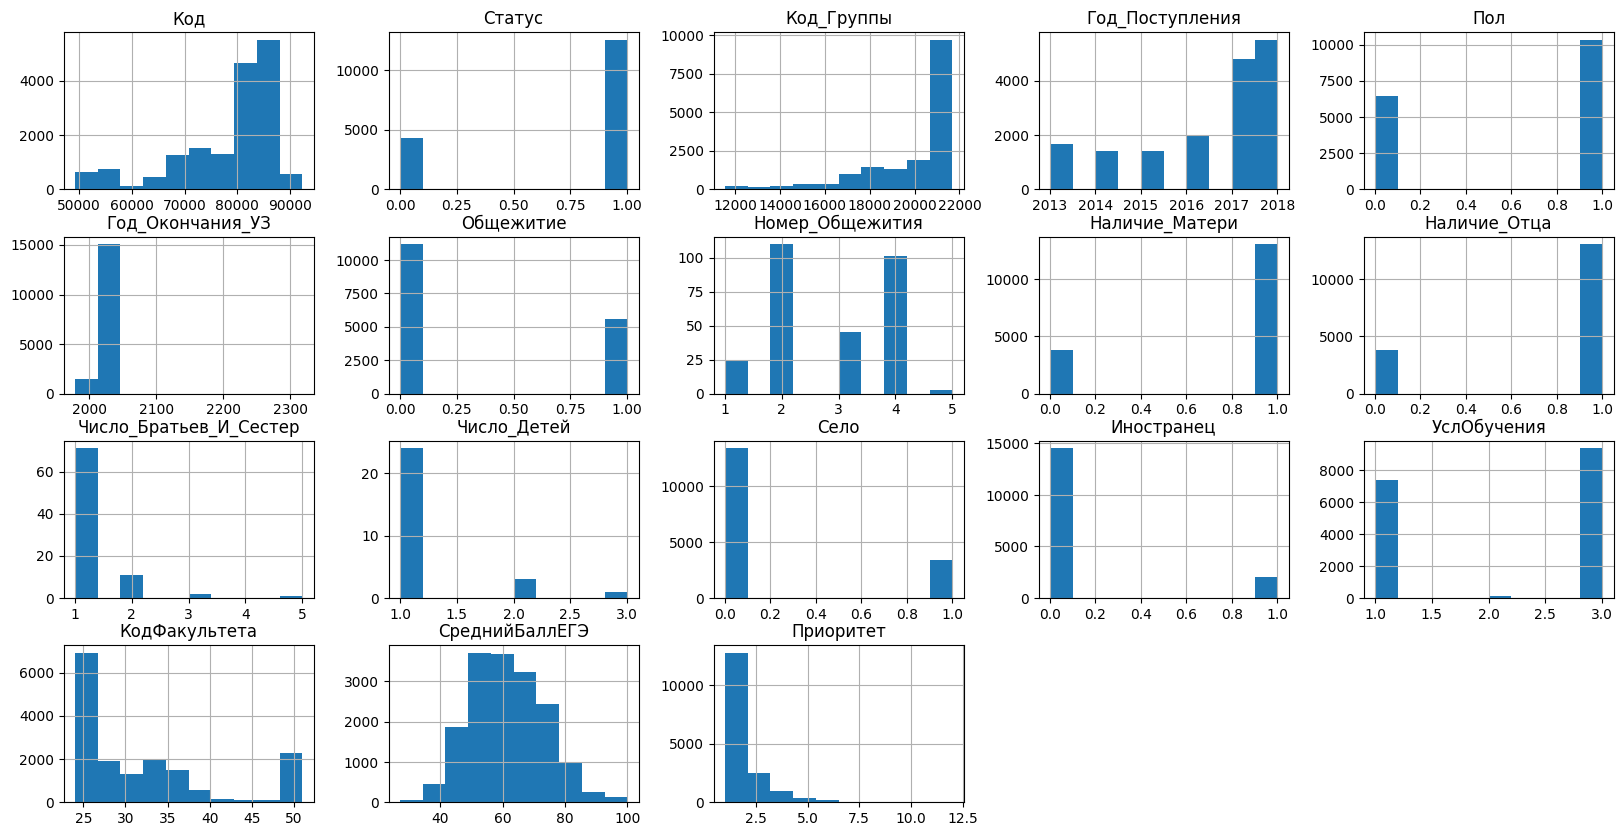

In [177]:
df.hist(figsize=(20, 10), layout=(-1, 5))
plt.show()

Задание №4

In [178]:
df['Город_ПП'] = df["Город_ПП"].str.extract("([А-Я][а-я]+-?[А-Я]?[а-я]*)", expand=False)
df['Город_Родители'] = df["Город_Родители"].str.extract("([А-Я][а-я]+-?[А-Я]?[а-я]*)", expand=False)

df["Страна_ПП"] = df["Страна_ПП"].str.extract("([А-Я][а-я]+)", expand=False)
emb = {'Барнаул': 'Россия'}
df['Страна_ПП'] = df['Страна_ПП'].replace(emb)

df["Страна_Родители"] = df["Страна_Родители"].str.extract("([А-Я][а-я]+)", expand=False)
emb = {'Барнаул': 'Россия'}
df['Страна_Родители'] = df['Страна_Родители'].replace(emb)

emb = {2318: 2018}
df['Год_Окончания_УЗ'] = df['Год_Окончания_УЗ'].replace(emb)

df['Регион_Родители'] = df['Регион_Родители'].str.lower().str.replace('область|обл.|обл|провинция|пров.|пров|пр.|республика|респ.|респ|джамоат|уезд|край', '', regex=True).str.strip()
df['Регион_ПП'] = df['Регион_ПП'].str.lower().str.replace('область|обл.|обл|провинция|пров.|пров|пр.|республика|респ.|респ|джамоат|уезд|край', '', regex=True).str.strip()

emb = {"2017": 'школа'}
df['Тип_УЗ'] = df['Тип_УЗ'].str.lower()
df['Тип_УЗ'] = df['Тип_УЗ'].replace(emb)
df['Отличник_УЗ'] = df['Отличник_УЗ'].str.lower()


Задание №5

In [179]:

df = df.rename(columns={'Дата_Рождения': 'Год_Рождения'})

for item, row in df.iterrows():
  date = row['Год_Рождения']

  if not pd.isna(date):
    year = date.split('.')[2]
    df.loc[item, 'Год_Рождения'] = int(year)

df['Год_Рождения'].unique()

array([1996, 1989, 1990, 1983, 1984, 1987, 1982, 1994, 1992, 1967, 1985,
       1988, 1991, 1973, 1995, 1977, 1979, 1986, 1993, 1980, 1970, nan,
       1981, 1978, 1975, 1976, 1963, 1974, 1966, 1961, 1971, 1997, 2012,
       1972, 1969, 1962, 1960, 1968, 1964, 1957, 1965, 1998, 1999, 2013,
       1958, 2000, 1946, 2001, 2002], dtype=object)

Задание №6

In [180]:
def sampling(key: str):
  for index in df[df[key].isnull()].index:
    sample = df.sample(replace=True)
    df.at[index,key] = sample.at[sample.index[0], key]


def fill_null_values(data_frame):
    data_frame['Число_Детей'] = data_frame['Число_Детей'].fillna(0)
    data_frame['Число_Братьев_И_Сестер'] = data_frame['Число_Братьев_И_Сестер'].fillna(0)
    data_frame['Отличник_УЗ'] = data_frame['Отличник_УЗ'].fillna(0)
    data_frame['Село'] = data_frame['Село'].fillna(0)
    data_frame['Общежитие'] = data_frame['Общежитие'].fillna(0)
    data_frame['Номер_Общежития'] = data_frame['Номер_Общежития'].fillna(0)
    data_frame['Пол'] = data_frame['Пол'].fillna(0)
    data_frame['Приоритет'] = data_frame['Приоритет'].fillna(0)

    data_frame['Год_Рождения'] = data_frame['Год_Рождения'].fillna(int(data_frame['Год_Рождения'].mean()))
    data_frame['Год_Окончания_УЗ'] = data_frame['Год_Окончания_УЗ'].fillna(int(data_frame['Год_Окончания_УЗ'].mean()))
    data_frame['СреднийБаллЕГЭ'] = data_frame['СреднийБаллЕГЭ'].fillna(int(data_frame['СреднийБаллЕГЭ'].mean()))
    data_frame['Код_Группы'] = data_frame['Код_Группы'].fillna(int(data_frame['Код_Группы'].mean()))
    data_frame['Изучаемый_Язык'] = data_frame['Изучаемый_Язык'].fillna('Английский язык')
    data_frame['Тип_УЗ'] = data_frame['Тип_УЗ'].fillna('школа')

    for index in data_frame[data_frame['Иностранец'].isnull()].index:
      if data_frame.iloc[index]['Страна_Родители'] != "Россия":
        data_frame.at[index,'Иностранец'] = 1
      else:
        data_frame.at[index, 'Иностранец'] = 0

    sampling('Уч_Заведение')
    sampling('Где_Находится_УЗ')
    sampling('Год_Окончания_УЗ')

    sampling('Регион_ПП')
    sampling('Город_ПП')

    sampling('Регион_Родители')
    sampling('Город_Родители')

    sampling('Страна_ПП')
    sampling('Страна_Родители')

    return data_frame


df = fill_null_values(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16824 entries, 0 to 16823
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Код                     16824 non-null  int64  
 1   Статус                  16824 non-null  int64  
 2   Код_Группы              16824 non-null  float64
 3   Год_Поступления         16824 non-null  int64  
 4   Пол                     16824 non-null  float64
 5   Основания               16824 non-null  object 
 6   Изучаемый_Язык          16824 non-null  object 
 7   Год_Рождения            16824 non-null  int64  
 8   Тип_УЗ                  16824 non-null  object 
 9   Уч_Заведение            16823 non-null  object 
 10  Где_Находится_УЗ        16806 non-null  object 
 11  Год_Окончания_УЗ        16824 non-null  float64
 12  Отличник_УЗ             16824 non-null  object 
 13  Страна_ПП               16817 non-null  object 
 14  Регион_ПП               16805 non-null

Задание №7

In [181]:
emb = {'СН' : 6, 'ОО' : 5, 'ДН' : 4, 'БН' : 3, 'ЦН' : 2, 'ЛН' : 1}
df['Основания'] = df['Основания'].map(emb)

emb = {'Английский язык' : 4, 'Немецкий язык' : 3, 'Французский язык' : 2, 'Русский язык' : 1}
df['Изучаемый_Язык'] = df['Изучаемый_Язык'].map(emb)

emb = {
       'школа' : 6,
       'колледж' : 5,
       'гимназия' : 4,
       'лицей' : 3,
       'университет' : 2,
       }
df['Тип_УЗ'] = df['Тип_УЗ'].map(emb).fillna(1)

emb = {
       'диплом с отличием' : 1,
       'серебряная медаль' : 1,
       'золотая медаль' : 1,
       'аттестат с отличием' : 1,
       }
df['Отличник_УЗ'] = df['Отличник_УЗ'].map(emb).fillna(0)

df = df.drop(columns=[
    'Уч_Заведение',
    'Где_Находится_УЗ',
    'Страна_ПП',
    'Код_Группы',
    'Регион_ПП',
    'Город_ПП',
    'Страна_Родители',
    'Регион_Родители',
    'Город_Родители',
    'Код'
    ])

Задание №8

In [182]:
random_features = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/random_features.csv"
)
df = pd.concat([df, random_features], axis=1)
df['random_1'] = df['random_1'].fillna(0)
df['random_2'] = df['random_2'].fillna(0)
df['random_3'] = df['random_3'].fillna(0)
df['random_4'] = df['random_4'].fillna(0)
df['random_5'] = df['random_5'].fillna(0)
df.head(5)

,Статус,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Рождения,Тип_УЗ,Год_Окончания_УЗ,Отличник_УЗ,Общежитие,...,Иностранец,УслОбучения,КодФакультета,СреднийБаллЕГЭ,Приоритет,random_1,random_2,random_3,random_4,random_5
0,1,2013,0.0,5,4,1996,6.0,2013.0,0.0,0.0,...,0.0,1,27,64.0,1.0,9.4,3.0,1.0,2.0,2.0
1,0,2013,0.0,5,4,1989,3.0,2011.0,1.0,0.0,...,0.0,1,27,53.0,1.0,9.8,2.0,1.0,1.0,1.0
2,1,2013,0.0,5,3,1990,1.0,2011.0,0.0,1.0,...,0.0,1,25,42.0,1.0,9.8,3.0,4.0,2.0,2.0
3,0,2013,0.0,6,4,1983,1.0,2003.0,0.0,0.0,...,0.0,3,25,54.0,1.0,9.8,2.0,1.0,3.0,1.0
4,1,2013,1.0,6,4,1984,6.0,2001.0,0.0,0.0,...,0.0,3,40,41.0,1.0,9.4,3.0,3.0,2.0,1.0



Задание №9

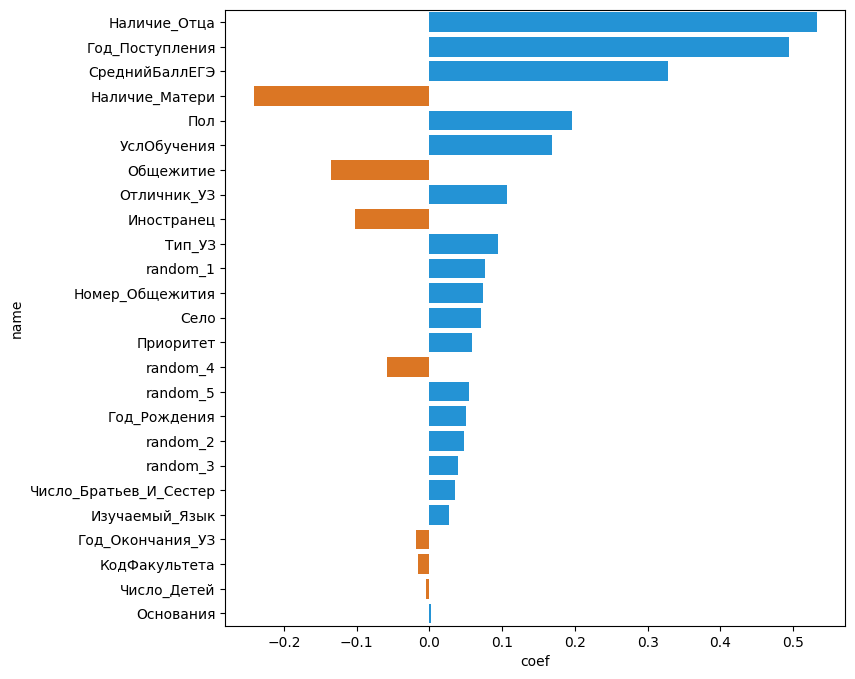

Index(['Год_Поступления', 'Пол', 'Общежитие', 'Наличие_Матери', 'Наличие_Отца',
       'УслОбучения', 'СреднийБаллЕГЭ'],
      dtype='object')

In [183]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import phik

scaler = StandardScaler()

x = df.drop(columns=['Статус'])
y = df["Статус"]  # target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)

df_data = pd.DataFrame({"name": x_train.columns, "coef": lr.coef_[0]}).sort_values(
    "coef", key=abs, ascending=False
)

df_data["colors"] = [
    sns.xkcd_rgb["orange"] if x < 0 else sns.xkcd_rgb["azure"] for x in df_data["coef"]
]


plt.figure(figsize=(8, 8))
sns.barplot(data=df_data, y="name", x="coef", palette=df_data.colors, orient="h")
plt.show()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# selecting features based on importance weights
lr_selector = SelectFromModel(LogisticRegression(max_iter=1000))
lr_selector.fit(x_train_scaled, y_train)
x_train.columns[lr_selector.get_support()]  # Get a mask of the features selected

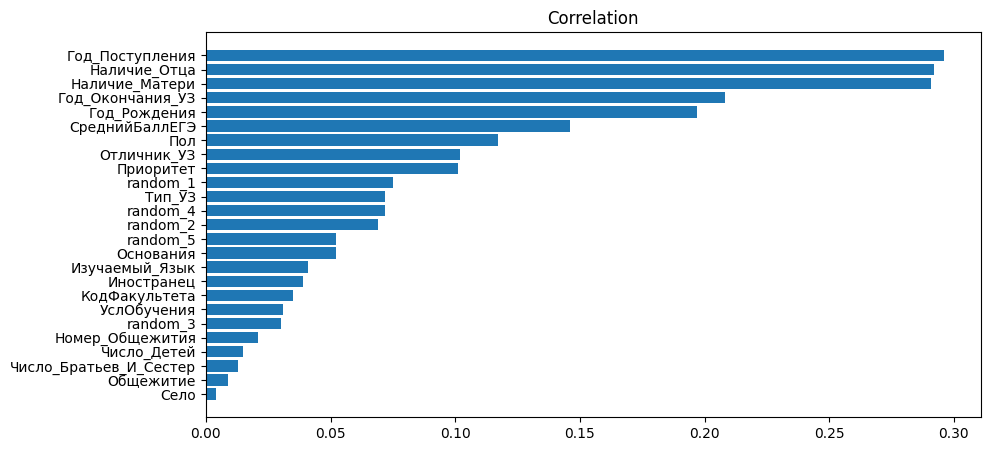

In [184]:
correlations = []  # create a storage for correlations
for column in x:
    r, p_value = stats.pearsonr(x_train[column], y_train)  # compute Pearson and R
    correlations.append((column, abs(r).round(3)))  # add to storage

df_corr = (
    pd.DataFrame(correlations, columns=["Corr_feature", "Correlation"])
    .sort_values("Correlation", ascending=False)
    .reset_index(drop=True)
)

sorted_idx = np.argsort(df_corr["Correlation"])
fig = plt.figure(figsize=(10, 5))
plt.barh(
    range(df_corr.shape[0]), df_corr["Correlation"].iloc[sorted_idx], align="center"
)
plt.yticks(range(df_corr.shape[0]), df_corr["Corr_feature"].iloc[sorted_idx])
plt.title("Correlation")
plt.show()

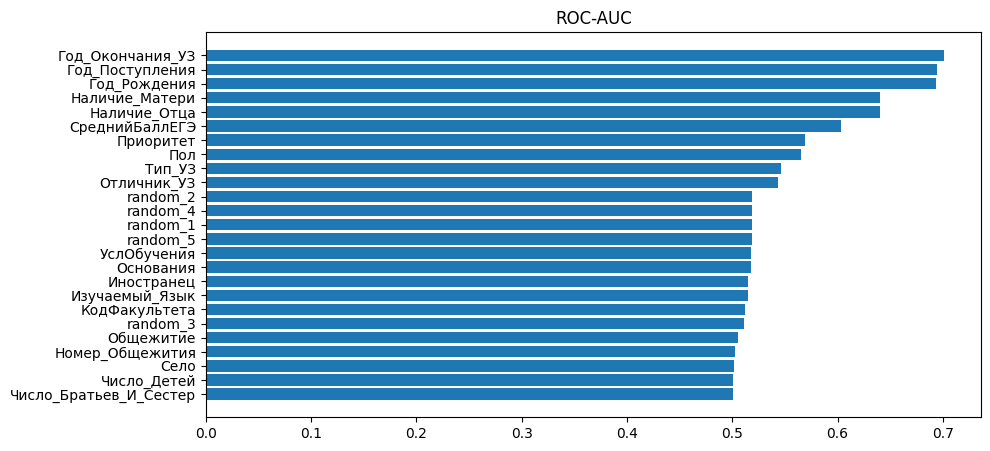

In [185]:
rocs = []  # create a storage for ROCs
for column in x:
    # use feature as score directly
    r1 = roc_auc_score(y_score=x_train[column], y_true=y_train)
    # use feature as score in reversed manner
    r2 = roc_auc_score(y_score=-x_train[column], y_true=y_train)
    r = max(r1, r2)
    rocs.append((column, r.round(3)))

df_rocs = (
    pd.DataFrame(rocs, columns=["Rocs_feature", "Rocs"])
    .sort_values("Rocs", ascending=False)
    .reset_index(drop=True)
)  # sort from highest to lowest

sorted_idx = np.argsort(df_rocs["Rocs"])
fig = plt.figure(figsize=(10, 5))
plt.barh(range(df_rocs.shape[0]), df_rocs["Rocs"].iloc[sorted_idx], align="center")
plt.yticks(range(df_rocs.shape[0]), df_rocs["Rocs_feature"].iloc[sorted_idx])
plt.title("ROC-AUC")
plt.show()


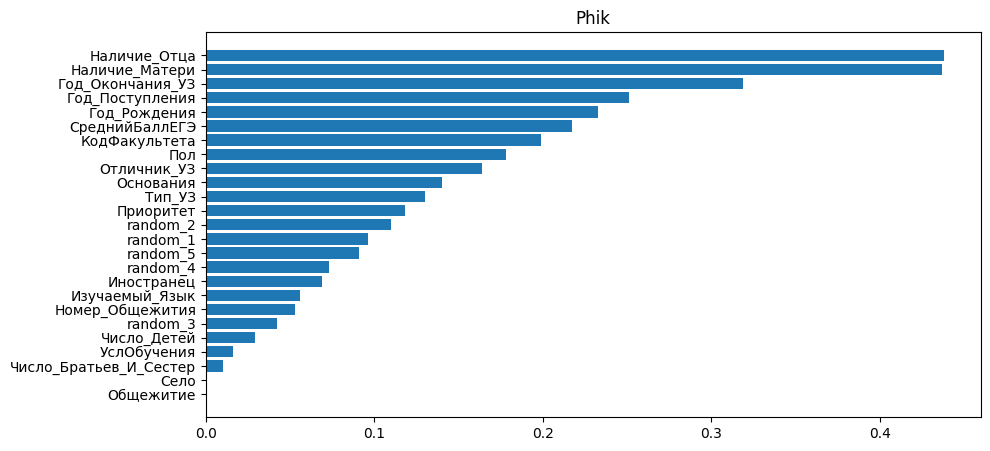

In [186]:
df_phik = (
    df.phik_matrix(interval_cols=df.columns)
    .round(3)
    .sort_values("Статус", ascending=False)
    .reset_index()[["index", "Статус"]][1:]
    .rename(columns={"index": "Phik_feature", "Статус": "Phik"})
    .reset_index(drop=True)
)

sorted_idx = np.argsort(df_phik["Phik"])
fig = plt.figure(figsize=(10, 5))
plt.barh(range(df_phik.shape[0]), df_phik["Phik"].iloc[sorted_idx], align="center")
plt.yticks(range(df_phik.shape[0]), df_phik["Phik_feature"].iloc[sorted_idx])
plt.title("Phik")
plt.show()

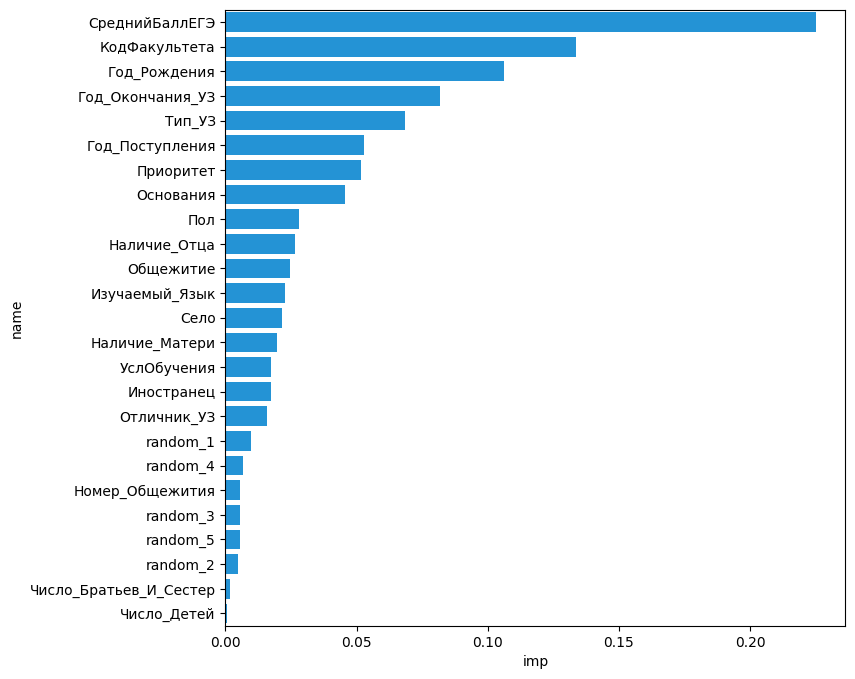

In [187]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

df = pd.DataFrame(
    {"name": x_train.columns, "imp": rf.feature_importances_}
).sort_values("imp", key=abs, ascending=False)

df["colors"] = [
    sns.xkcd_rgb["orange"] if x < 0 else sns.xkcd_rgb["azure"] for x in df["imp"]
]


plt.figure(figsize=(8, 8))
sns.barplot(data=df, y="name", x="imp", palette=df.colors, orient="h")
plt.show()

Learning rate set to 0.060225
0:	learn: 0.6674811	test: 0.6690957	best: 0.6690957 (0)	total: 9.14ms	remaining: 9.13s
100:	learn: 0.4306958	test: 0.4640048	best: 0.4640048 (100)	total: 546ms	remaining: 4.86s
200:	learn: 0.4024482	test: 0.4489917	best: 0.4489917 (200)	total: 1.15s	remaining: 4.56s
300:	learn: 0.3807194	test: 0.4397082	best: 0.4397072 (299)	total: 1.67s	remaining: 3.88s
400:	learn: 0.3604903	test: 0.4329268	best: 0.4329268 (400)	total: 2.19s	remaining: 3.27s
500:	learn: 0.3448931	test: 0.4291739	best: 0.4290927 (492)	total: 2.73s	remaining: 2.71s
600:	learn: 0.3319797	test: 0.4254304	best: 0.4254304 (600)	total: 3.24s	remaining: 2.15s
700:	learn: 0.3206027	test: 0.4223292	best: 0.4223069 (699)	total: 3.78s	remaining: 1.61s
800:	learn: 0.3110632	test: 0.4208590	best: 0.4208090 (797)	total: 4.95s	remaining: 1.23s
900:	learn: 0.3023228	test: 0.4191946	best: 0.4191946 (900)	total: 6.24s	remaining: 686ms
999:	learn: 0.2937643	test: 0.4183942	best: 0.4183143 (994)	total: 7.5s	r

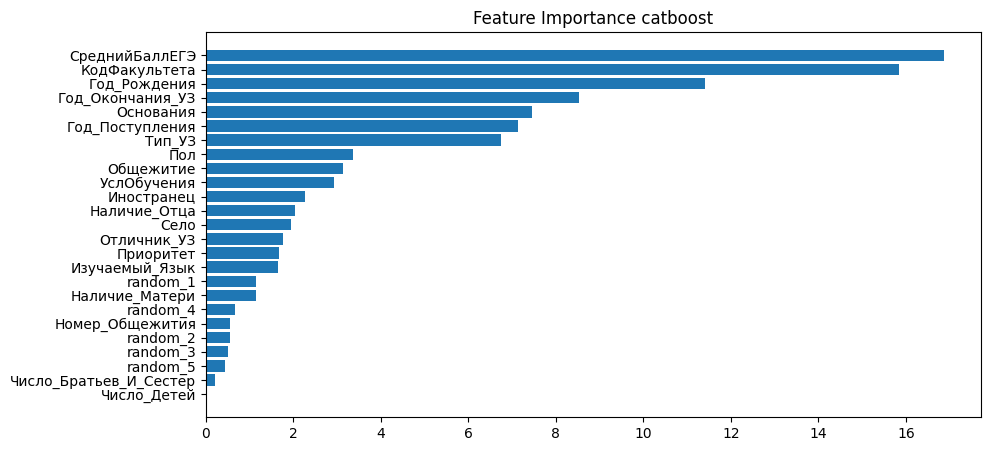

In [188]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=42, thread_count=-1)
model.fit(
    x_train,
    y_train,
    eval_set=(x_test, y_test),
    verbose=100,
    plot=False,
    early_stopping_rounds=100,
)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(x.columns)[sorted_idx])
plt.title("Feature Importance catboost")
plt.show()

Проведя анализ, можем выделить следующие наиболее влиятельные признаки:

1.   Средний балл ЕГЭ - количество баллов ЕГЭ отражают уровень подготовки, знаний и, возможно, мотивацию человека учиться
2.   Код факультета - чем пристижнее факультет, тем больше будет стремление абитуриента поступить и закончить университет
3.    Год рождения - возможно, чем человек старше, тем больше вероятность того, что он пришел учиться осознанно
4.    Основания - у студентов, обучающихся на внебюджетной форме обучения или целевой квоте, есть мотивация закончить университет
5.    Год поступления - чем, раньше поступил в университет, тем дольше учишься в нем, тем больше вероятность закончить его



In [189]:
summary = model.select_features(
    x_train,
    y_train,
    eval_set=(x_test, y_test),
    features_for_select="0-19",
    num_features_to_select=5,
    steps=1,
    train_final_model=False,
    logging_level="Silent",
)

print(summary["selected_features_names"])

['Год_Поступления', 'Год_Окончания_УЗ', 'Наличие_Отца', 'КодФакультета', 'СреднийБаллЕГЭ']


In [190]:

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train).round(3))
print("Testing Accuracy: ", model.score(x_test, y_test).round(3))

Training Accuracy:  0.994
Testing Accuracy:  0.826
